<a href="https://colab.research.google.com/github/1X-HE/OKOKqm2/blob/main/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HYPOTHESIS TESTING: AIRBNB DENSITY vs CRIME RATE CORRELATION
Number of observations: 32

HYPOTHESES:
H0: There is no correlation between Airbnb density and crime rates across London boroughs
H1: There is a significant correlation between Airbnb density and crime rates across London boroughs

TEST RESULTS:
Pearson Correlation Test :
  Correlation coefficient (r): 0.868988
  P-value: 0.00000000011225764780
  P-value (full precision): 1.1225764779985641e-10
  R-squared: 0.755140

Spearman Rank Correlation Test :
  Correlation coefficient (ρ): 0.765396
  P-value: 0.00000033450034138957
  P-value (full precision): 3.345003413895667e-07

INTERPRETATION:
Significance level (α): 0.05

Since p-value (0.00000000011225764780) < α (0.05), we REJECT the null hypothesis (H0)
There is statistically significant evidence of correlation between Airbnb density and crime rates

DATA CHARACTERISTICS:
Number of data points: 32
Mean crime rate: 105.01
Standard deviation of crime rate: 63.79
Mean Airbnb densi

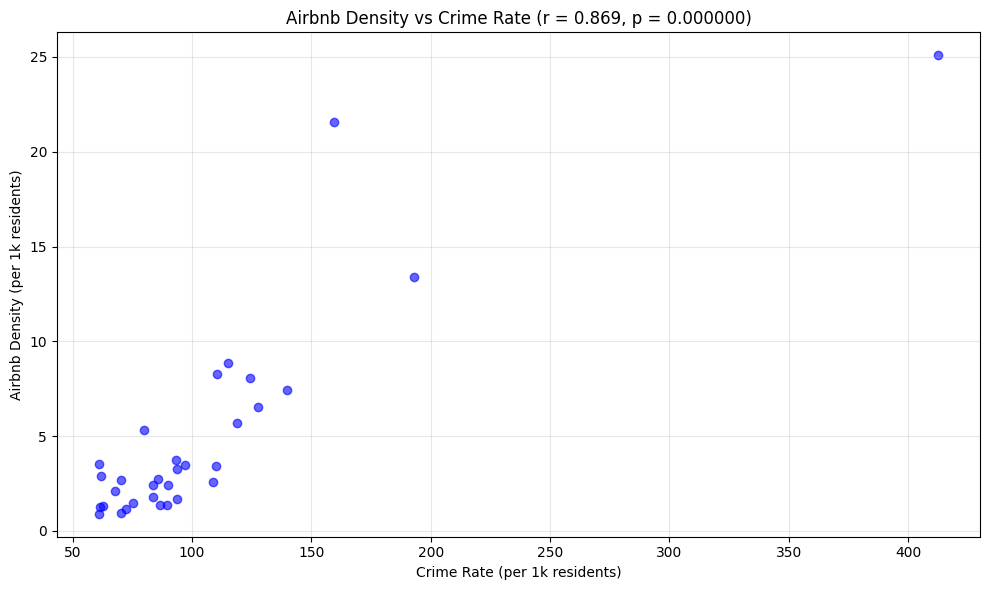

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('borough_metrics_ons2024_per1k.csv')

required_cols = ['crime_rate_per_1k', 'airbnb_density_per_1k']
if not all(col in df.columns for col in required_cols):
    missing = [col for col in required_cols if col not in df.columns]
    raise ValueError(f"Required columns missing in CSV file: {missing}")

# Clean data
df_clean = df[required_cols].dropna()

# Extract the two variables
crime_rate = df_clean['crime_rate_per_1k']
airbnb_density = df_clean['airbnb_density_per_1k']

# Show Pearson correlation test
pearson_corr, pearson_p_value = pearsonr(crime_rate, airbnb_density)

# Show Spearman rank correlation test (non-parametric alternative)
spearman_corr, spearman_p_value = spearmanr(crime_rate, airbnb_density)

# Set significance level
alpha = 0.05

# Print results
print("=" * 60)
print("HYPOTHESIS TESTING: AIRBNB DENSITY vs CRIME RATE CORRELATION")
print("=" * 60)
print(f"Number of observations: {len(df_clean)}")
print()

# Hypothesis statement
print("HYPOTHESES:")
print("H0: There is no correlation between Airbnb density and crime rates across London boroughs")
print("H1: There is a significant correlation between Airbnb density and crime rates across London boroughs")
print()

# Test results
print("TEST RESULTS:")
print("Pearson Correlation Test :")
print(f"  Correlation coefficient (r): {pearson_corr:.6f}")
print(f"  P-value: {pearson_p_value:.20f}")
print(f"  P-value (full precision): {pearson_p_value}")
print(f"  R-squared: {pearson_corr**2:.6f}")
print()

print("Spearman Rank Correlation Test :")
print(f"  Correlation coefficient (ρ): {spearman_corr:.6f}")
print(f"  P-value: {spearman_p_value:.20f}")
print(f"  P-value (full precision): {spearman_p_value}")
print()


# Interpret Pearson test results
print("INTERPRETATION:")
print(f"Significance level (α): {alpha}")
print()

# More precise comparison
if pearson_p_value < 1e-300:
    print("The p-value is extremely small (effectively 0 at standard precision levels)")
    print("This provides very strong evidence to REJECT the null hypothesis (H0)")
    print("There is statistically significant evidence of correlation between Airbnb density and crime rates")
elif pearson_p_value < alpha:
    print(f"Since p-value ({pearson_p_value:.20f}) < α ({alpha}), we REJECT the null hypothesis (H0)")
    print("There is statistically significant evidence of correlation between Airbnb density and crime rates")
else:
    print(f"Since p-value ({pearson_p_value:.20f}) ≥ α ({alpha}), we FAIL TO REJECT the null hypothesis (H0)")
    print("There is insufficient evidence to conclude a significant correlation between Airbnb density and crime rates")
print()

# Check data characteristics
print("DATA CHARACTERISTICS:")
print(f"Number of data points: {len(df_clean)}")
print(f"Mean crime rate: {crime_rate.mean():.2f}")
print(f"Standard deviation of crime rate: {crime_rate.std():.2f}")
print(f"Mean Airbnb density: {airbnb_density.mean():.2f}")
print(f"Standard deviation of Airbnb density: {airbnb_density.std():.2f}")
print()

# Calculate confidence interval for correlation
n = len(df_clean)
z = 0.5 * np.log((1 + pearson_corr) / (1 - pearson_corr))
se = 1 / np.sqrt(n - 3)
z_lower = z - 1.96 * se
z_upper = z + 1.96 * se
ci_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
ci_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

print("95% CONFIDENCE INTERVAL FOR CORRELATION:")
print(f"Correlation coefficient: {pearson_corr:.6f}")
print(f"95% CI: [{ci_lower:.6f}, {ci_upper:.6f}]")
print()

# Correlation analysis
print("CORRELATION ANALYSIS:")
if abs(pearson_corr) >= 0.7:
    strength = "strong"
elif abs(pearson_corr) >= 0.3:
    strength = "moderate"
else:
    strength = "weak"

if pearson_corr > 0:
    print(f"The correlation is positive ({pearson_corr:.6f}) and {strength}")
    print("This suggests that as Airbnb density increases, crime rates tend to also increase")
elif pearson_corr < 0:
    print(f"The correlation is negative ({pearson_corr:.6f}) and {strength}")
    print("This suggests that as Airbnb density increases, crime rates tend to decrease")
else:
    print("There is no linear correlation between the variables")

# Create graph
plt.figure(figsize=(10, 6))
plt.scatter(crime_rate, airbnb_density, alpha=0.6, color='blue')
plt.xlabel('Crime Rate (per 1k residents)')
plt.ylabel('Airbnb Density (per 1k residents)')
plt.title(f'Airbnb Density vs Crime Rate (r = {pearson_corr:.3f}, p = {pearson_p_value:.6f})')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_plot_english.png', dpi=300)
plt.show()

